In [1]:
#Downloaded the text files from https://file.biolab.si/text-semantics/data/proposals-to-government-1k/ 
#Merging the downloaded text files from the folder I kept them

import os

folder_path = "C:/Users/SRINIVAS/Desktop/ques"
text_files = [f for f in os.listdir(folder_path) if f.endswith('.txt')]

with open('C:/Users/SRINIVAS/Desktop/ques/merged_file.txt', 'w', encoding="utf8") as outfile:
    for file_name in text_files:
        with open(os.path.join(folder_path, file_name), "r", encoding="utf8") as infile:
            outfile.write(infile.read())

In [2]:
#Reading the file
with open("merged_file.txt", "r") as file:
    text_file = file.read()

print(text_file)

Dear Sir or Madam! Slovenia is currently already in a situation of being a transit country, as far as transport infrastructure is concerned. The motorways are heavily congested, and there is a huge amount of renovation work, mainly during a period when the roads are also characterised by congestion caused by foreign citizens. Freight traffic is an additional, and extremely heavy, burden. There is a huge amount of traffic, too much for Slovenian motorways.

Partial overtaking bans for freight vehicles can be observed on certain sections, but often only with a time limit. I propose to the Ministry of Transport and Infrastructure that it should generally ban overtaking by all goods vehicles and vehicles which, by their very nature, have a maximum speed limit for the carriage of goods. This would apply for 24 hours on all sections of motorways. Breaking it would result in heavy penalties for both the driver and the haulier.I suggest for all those employers and workers who work on a part-ti

# Cleaning the data

In [3]:
#Making every letter small
text_file = text_file.lower()
#print(text_file)

In [4]:
#Importing regular expressions
import re

#Removeing the punctuations and special characters (by using not alphanumeric,spaces and fullstops)
text_file = re.sub(r'[^\w\s.]', '', text_file)
#print(text_file)

In [5]:
#Removing numbers both the individual and numbers present inside a word
text_file = re.sub(r'\b\w*\d+\w*\b', '', text_file)
#print(text_file)

In [6]:
#Handling some common contractions
contractions = {"can't": "cannot", "won't": "will not", "ain't": "am not", "don't":"do not","didn't": "did not"}
text_file = " ".join([contractions[word] if word in contractions else word for word in text_file.split()])
#print(text_file)

In [7]:
#removing the websites
text_file = re.sub(r'(www\.)\S+', '', text_file)
#print(text_file)

In [8]:
#sepearting the word from fullstops
text_file = re.sub(r'([^\s])\.([^\s])', r'\1. \2', text_file)

#remove spaces between fullstops
text_file = re.sub(r'(?<=[a-zA-Z])\s*\.\.+', "", text_file)

# replace fullstops by 1 fullstop if they are next to one another
text_file = re.sub(r'\.+', ".", text_file)


#print(text_file)

In [9]:
#Removing non-ascii characters caused by encoding problems
text_file = re.sub(r'[^\x00-\x7F]+', '', text_file)
#print(text_file)

In [10]:
import nltk
nltk.download('stopwords')

#Removing stop words
stop_words = set(nltk.corpus.stopwords.words("english"))
text_file = " ".join([word for word in text_file.split() if word not in stop_words])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SRINIVAS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
#Saving it to a file
with open("clean.txt", "w", encoding="utf8") as file:
    file.write(text_file)

# Using Sentence tokenizers

In [12]:
import numpy as np

#Reading in file
with open("clean.txt", "r") as file:
    text = file.read()

#Splitting the text into sentences
sentences = nltk.sent_tokenize(text)

for sent in sentences:
    print(sent)

dear sir madam slovenia currently already situation transit country far transport infrastructure concerned.
motorways heavily congested huge amount renovation work mainly period roads also characterised congestion caused foreign citizens.
freight traffic additional extremely heavy burden.
huge amount traffic much slovenian motorways.
partial overtaking bans freight vehicles observed certain sections often time limit.
propose ministry transport infrastructure generally ban overtaking goods vehicles vehicles nature maximum speed limit carriage goods.
would apply hours sections motorways.
breaking would result heavy penalties driver haulier.
suggest employers workers work parttime basis possibility parttime fulltime employment starting new job.
hours per week contractwhich casethe employer obliged work certain amount hoursthe worker works needs itso hours per week depending needovertime exist worker paid hours works.
wage paid every hours one dayno recourseno transport reimbursementsnacks

# Parse Trees

In [13]:
#still there are some fullstops that are confusing so removng them while splitting into sentences
import numpy as np


#Creating a list to store the parse trees
parse_trees = []

#Looping through sentences and construct parse tree
for sen in sentences:
    sen = sen.replace(".", "")
    words = nltk.word_tokenize(sen)
    pos_tags = nltk.pos_tag(words)
    parse_tree = nltk.ne_chunk(pos_tags)
    parse_trees.append(parse_tree)

print(parse_trees)

[Tree('S', [('dear', 'JJ'), ('sir', 'NN'), ('madam', 'NN'), ('slovenia', 'VBZ'), ('currently', 'RB'), ('already', 'RB'), ('situation', 'NN'), ('transit', 'NN'), ('country', 'NN'), ('far', 'RB'), ('transport', 'JJ'), ('infrastructure', 'NN'), ('concerned', 'VBD')]), Tree('S', [('motorways', 'NNS'), ('heavily', 'RB'), ('congested', 'VBD'), ('huge', 'JJ'), ('amount', 'NN'), ('renovation', 'NN'), ('work', 'NN'), ('mainly', 'RB'), ('period', 'NN'), ('roads', 'NNS'), ('also', 'RB'), ('characterised', 'VBD'), ('congestion', 'NN'), ('caused', 'VBN'), ('foreign', 'JJ'), ('citizens', 'NNS')]), Tree('S', [('freight', 'NN'), ('traffic', 'NN'), ('additional', 'JJ'), ('extremely', 'RB'), ('heavy', 'JJ'), ('burden', 'NN')]), Tree('S', [('huge', 'JJ'), ('amount', 'NN'), ('traffic', 'NN'), ('much', 'JJ'), ('slovenian', 'NN'), ('motorways', 'NNS')]), Tree('S', [('partial', 'JJ'), ('overtaking', 'VBG'), ('bans', 'NNS'), ('freight', 'JJ'), ('vehicles', 'NNS'), ('observed', 'VBD'), ('certain', 'JJ'), ('sec

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

# Extract words from parse trees
words = []
for tree in parse_trees:
    parse_tree_words = [word for word, tag in tree]
    words.append(' '.join(parse_tree_words))

# Encode parse trees as bag-of-words
vectorizer = CountVectorizer()
encoded_tree = vectorizer.fit_transform(words)

In [15]:
encoded_trees = encoded_tree.toarray()

# KMeans

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
si_kmeans = []
cal_kmeans = []
dav_kmeans = []

for i in range(2,10):
    kmeans = KMeans(n_clusters= i, random_state = 9)
    kmeans.fit(encoded_trees)
    predictions = kmeans.predict(encoded_trees)
    si_score = silhouette_score(encoded_trees, predictions)
    si_kmeans.append(si_score)
    cal_score = calinski_harabasz_score(encoded_trees, predictions)
    cal_kmeans.append(cal_score)
    dav_score = davies_bouldin_score(encoded_trees, predictions)
    dav_kmeans.append(dav_score)
    
    
print(si_kmeans)
print(si_kmeans.index(max(si_kmeans))+2)

print(cal_kmeans)
print(cal_kmeans.index(max(cal_kmeans))+2)

print(dav_kmeans)
print(dav_kmeans.index(min(dav_kmeans))+2)

[0.09612864825311428, 0.2141794825995867, 0.09185269835291189, 0.08080411631675193, 0.4031849005412725, 0.340020496385081, 0.30440235211587935, 0.1828904996294768]
6
[34.58897771464914, 32.76895658675813, 24.692820460814637, 22.55092323201816, 18.21789935770905, 17.56924881774273, 15.881127995873065, 16.938204924659264]
2
[5.5341264332902185, 3.213680709054961, 3.0032314514570664, 4.3571091133341024, 0.9988804689359633, 1.0314314483698028, 0.7137832558628292, 1.7523292406109647]
8


In [17]:
'''
Going with 6 clusters and random_state as it has all the values in a good range overall for 
all the 3 scores, has a good sillhoute score,calinski score and also davies bouldin score is less which is good 
''' 

'\nGoing with 6 clusters and random_state as it has all the values in a good range overall for \nall the 3 scores, has a good sillhoute score,calinski score and also davies bouldin score is less which is good \n'

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

kmeans = KMeans(n_clusters= 6, random_state = 9)  
kmeans.fit(encoded_trees)
kmeans_predictions = kmeans.predict(encoded_trees)

si_score = silhouette_score(encoded_trees, kmeans_predictions)
print(f'K-means Clustering silhouette score: {si_score:.2f}')

cal_score = calinski_harabasz_score(encoded_trees, kmeans_predictions)
print(f'K-means Clustering Calinski-Harabasz score: {cal_score:.2f}')

dav_score = davies_bouldin_score(encoded_trees, kmeans_predictions)
print(f'K-means Clustering Davies-Bouldin score: {dav_score:.2f}')

K-means Clustering silhouette score: 0.40
K-means Clustering Calinski-Harabasz score: 18.22
K-means Clustering Davies-Bouldin score: 1.00


In [19]:
#Creating a list to store the 6 clusters
kmeans_clusters = [[] for i in range(kmeans.n_clusters)]

#Looping through predictions and parse trees and group them by cluster
for cluster, tree in zip(kmeans_predictions, parse_trees):
    kmeans_clusters[cluster].append(tree)

print(kmeans_clusters)

[[Tree('S', [('also', 'RB'), ('fulfil', 'JJ'), ('condition', 'NN'), ('carrying', 'VBG'), ('technical', 'JJ'), ('inspections', 'NNS'), ('want', 'VBP'), ('registration', 'NN'), ('offices', 'NNS'), ('following', 'VBG'), ('procedures', 'NNS'), ('concerning', 'VBG'), ('vehicles', 'NNS'), ('arranged', 'VBN'), ('registration', 'NN'), ('new', 'JJ'), ('vehicle', 'NN'), ('renewal', 'NN'), ('registration', 'NN'), ('vehicles', 'NNS'), ('require', 'VBP'), ('roadworthiness', 'JJ'), ('test', 'NN'), ('removal', 'NN'), ('vehicle', 'NN'), ('road', 'NN'), ('transcription', 'NN'), ('change', 'NN'), ('vehicle', 'NN'), ('ownership', 'NN'), ('identification', 'NN'), ('persons', 'NNS'), ('change', 'VBP'), ('situation', 'NN'), ('would', 'MD'), ('greatly', 'RB'), ('help', 'VB'), ('reduce', 'VB'), ('crowds', 'JJ'), ('otherwise', 'RB'), ('see', 'VBP'), ('roadworthiness', 'JJ'), ('tests', 'NNS'), ('administrative', 'JJ'), ('units', 'NNS'), ('would', 'MD'), ('bring', 'VB'), ('work', 'NN'), ('public', 'JJ'), ('admin

In [20]:
#Finding the grouped sentences using the parse trees
kmeans_clusters_sent = [[] for i in range(kmeans.n_clusters)]

#Looping through parse tree clusters and making them into 6 sentence clusters
for cluster, sentence in zip(kmeans_predictions, sentences):
    kmeans_clusters_sent[cluster].append(sentence)

print(kmeans_clusters_sent)

[['also fulfil condition carrying technical inspections want registration offices following procedures concerning vehicles arranged registration new vehicle renewal registration vehicles require roadworthiness test removal vehicle road transcription change vehicle ownership identification persons change situation would greatly help reduce crowds otherwise see roadworthiness tests administrative units would bring work public administration closer citizens especially elderly municipalities origin provide services.', 'also fulfil condition carrying technical inspections want registration offices following procedures concerning vehicles arranged registration new vehicle renewal registration vehicles require roadworthiness test removal vehicle circulation transcription change vehicle ownership identification persons change situation would greatly help reduce crowds otherwise see roadworthiness tests administrative units would bring work public administration closer citizens especially elder

In [21]:
len(kmeans_clusters_sent)

6

# Heirarchial Agglomerative

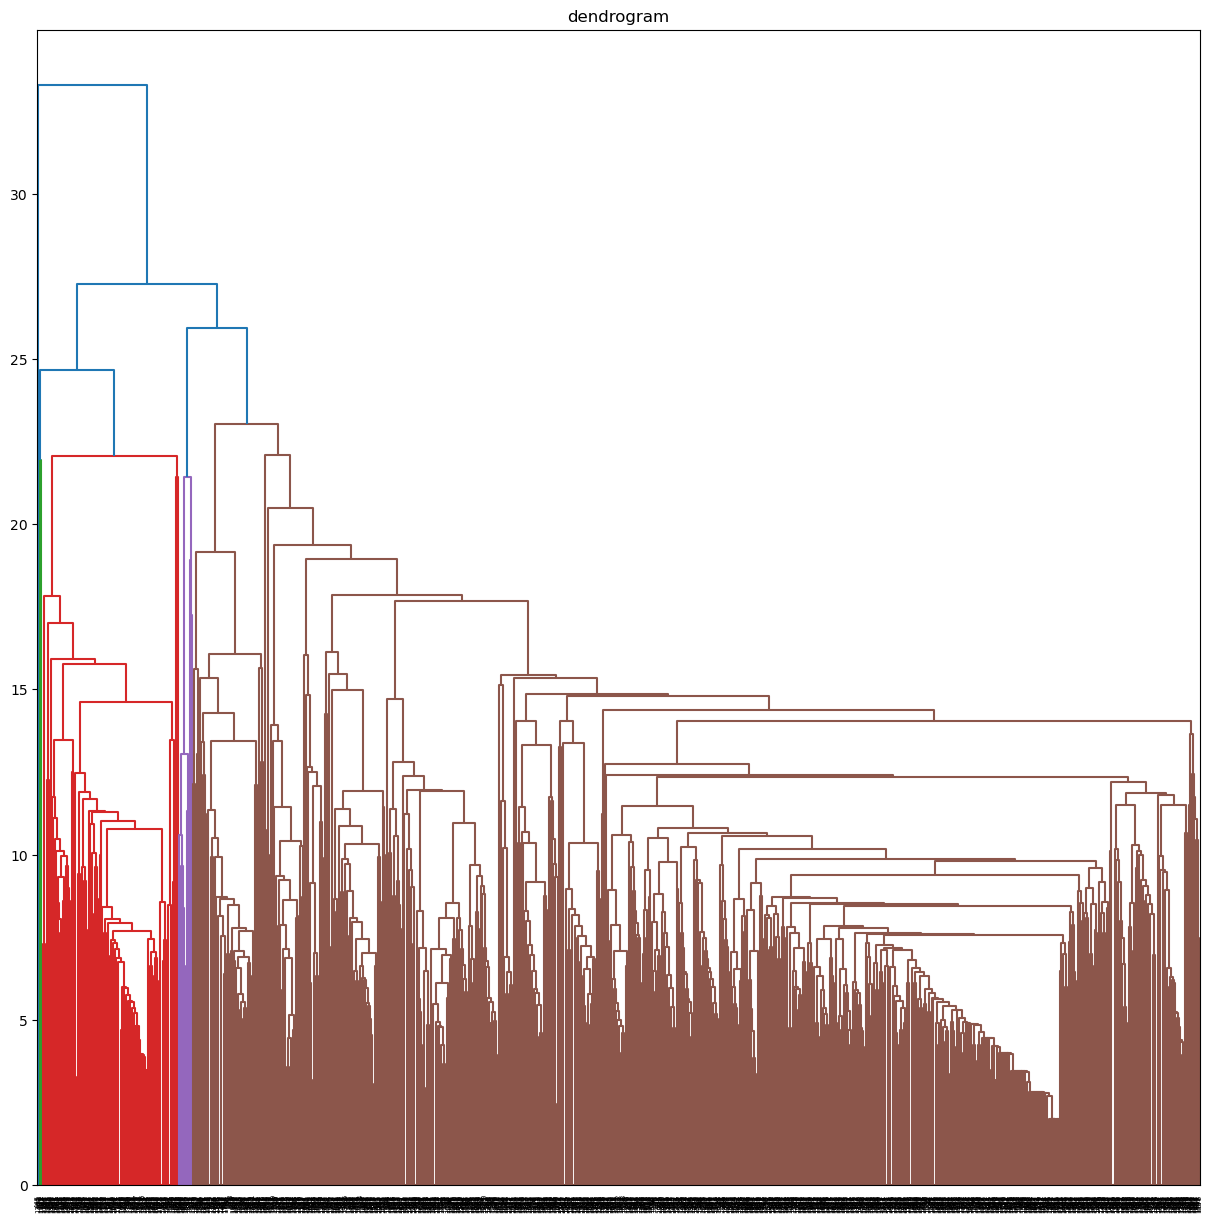

In [22]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
plt.title('dendrogram')
dend = shc.dendrogram(shc.linkage(encoded_trees, method = 'ward'))

In [23]:
from sklearn.cluster import AgglomerativeClustering
si_agg = []
cal_agg = []
dav_agg = []

for i in range(2,10):
    agg_clustering = AgglomerativeClustering(n_clusters=i, linkage = 'average') 
    agg_clustering.fit(encoded_trees)
    predictions = agg_clustering.fit_predict(encoded_trees)

    si_score = silhouette_score(encoded_trees, predictions)
    si_agg.append(si_score)
    cal_score = calinski_harabasz_score(encoded_trees, predictions)
    cal_agg.append(cal_score)
    dav_score = davies_bouldin_score(encoded_trees, predictions)
    dav_agg.append(dav_score)
    
    
print(si_agg)
print(si_agg.index(max(si_agg))+2)

print(cal_agg)
print(cal_agg.index(max(cal_agg))+2)

print(dav_agg)
print(dav_agg.index(min(dav_agg))+2)

[0.6867529997926513, 0.5643226154370179, 0.5462954738067506, 0.5433660173065817, 0.5319890991133408, 0.5270376208699363, 0.5222755041355489, 0.47938994410367636]
2
[34.91787959757152, 26.15039054794289, 22.780232885327333, 21.131815810699013, 19.966127768390727, 19.172305965639858, 18.558319997288272, 17.753001875654284]
2
[0.22161208087857323, 0.2853679998328455, 0.3006233093558459, 0.30677737097123275, 0.31449407954290715, 0.3191402575146891, 0.3235773959226673, 0.3352240024656685]
2


In [24]:
'''
I am going for both 2 and 3 but 2 is best in terms of evaluation scores but 2 clusters are not well spread '''
#First 2 clusters

from sklearn.cluster import AgglomerativeClustering
agg_clustering_2 = AgglomerativeClustering() #default is 2 clusters
agg_clustering_2.fit(encoded_trees)
agg_predictions_2 = agg_clustering_2.fit_predict(encoded_trees)

si_score_2 = silhouette_score(encoded_trees, agg_predictions_2)
print(f'Hierarchical Clustering silhouette score: {si_score_2:.2f}')

cal_score_2 = calinski_harabasz_score(encoded_trees, agg_predictions_2)
print(f'Hierarchical Clustering Calinski-Harabasz score: {cal_score_2:.2f}')

dav_score_2 = davies_bouldin_score(encoded_trees, agg_predictions_2)
print(f'Hierarchical Clustering Davies-Bouldin score: {dav_score_2:.2f}')

Hierarchical Clustering silhouette score: 0.69
Hierarchical Clustering Calinski-Harabasz score: 34.92
Hierarchical Clustering Davies-Bouldin score: 0.22


In [25]:
#Creating a list to store the 2 clusters
agg_clusters_2 = [[] for i in range(agg_clustering_2.n_clusters)]

#Looping through predictions and parse trees and group them into clusters
for cluster, tree in zip(agg_predictions_2, parse_trees):
    agg_clusters_2[cluster].append(tree)

print(agg_clusters_2)

[[Tree('S', [('dear', 'JJ'), ('sir', 'NN'), ('madam', 'NN'), ('slovenia', 'VBZ'), ('currently', 'RB'), ('already', 'RB'), ('situation', 'NN'), ('transit', 'NN'), ('country', 'NN'), ('far', 'RB'), ('transport', 'JJ'), ('infrastructure', 'NN'), ('concerned', 'VBD')]), Tree('S', [('motorways', 'NNS'), ('heavily', 'RB'), ('congested', 'VBD'), ('huge', 'JJ'), ('amount', 'NN'), ('renovation', 'NN'), ('work', 'NN'), ('mainly', 'RB'), ('period', 'NN'), ('roads', 'NNS'), ('also', 'RB'), ('characterised', 'VBD'), ('congestion', 'NN'), ('caused', 'VBN'), ('foreign', 'JJ'), ('citizens', 'NNS')]), Tree('S', [('freight', 'NN'), ('traffic', 'NN'), ('additional', 'JJ'), ('extremely', 'RB'), ('heavy', 'JJ'), ('burden', 'NN')]), Tree('S', [('huge', 'JJ'), ('amount', 'NN'), ('traffic', 'NN'), ('much', 'JJ'), ('slovenian', 'NN'), ('motorways', 'NNS')]), Tree('S', [('partial', 'JJ'), ('overtaking', 'VBG'), ('bans', 'NNS'), ('freight', 'JJ'), ('vehicles', 'NNS'), ('observed', 'VBD'), ('certain', 'JJ'), ('se

In [26]:
#Finding the grouped sentences using the parse trees
agg_clusters_2_sent = [[] for i in range(agg_clustering_2.n_clusters)]

#Looping through parse tree clusters and and making them into 2 sentence clusters
for cluster, sentence in zip(agg_predictions_2, sentences):
    agg_clusters_2_sent[cluster].append(sentence)

print(agg_clusters_2_sent)

[['dear sir madam slovenia currently already situation transit country far transport infrastructure concerned.', 'motorways heavily congested huge amount renovation work mainly period roads also characterised congestion caused foreign citizens.', 'freight traffic additional extremely heavy burden.', 'huge amount traffic much slovenian motorways.', 'partial overtaking bans freight vehicles observed certain sections often time limit.', 'propose ministry transport infrastructure generally ban overtaking goods vehicles vehicles nature maximum speed limit carriage goods.', 'would apply hours sections motorways.', 'breaking would result heavy penalties driver haulier.', 'suggest employers workers work parttime basis possibility parttime fulltime employment starting new job.', 'hours per week contractwhich casethe employer obliged work certain amount hoursthe worker works needs itso hours per week depending needovertime exist worker paid hours works.', 'wage paid every hours one dayno recours

In [27]:
len(agg_clusters_2_sent)

2

In [28]:
#Now AgglomerativeClustering for 3 cluster
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=3) 
agg_clustering.fit(encoded_trees)
agg_predictions = agg_clustering.fit_predict(encoded_trees)

si_score = silhouette_score(encoded_trees, agg_predictions)
print(f'Hierarchical Clustering silhouette score: {si_score:.2f}')

cal_score = calinski_harabasz_score(encoded_trees, agg_predictions)
print(f'Hierarchical Clustering Calinski-Harabasz score: {cal_score:.2f}')

dav_score = davies_bouldin_score(encoded_trees, agg_predictions)
print(f'Hierarchical Clustering Davies-Bouldin score: {dav_score:.2f}')

Hierarchical Clustering silhouette score: 0.10
Hierarchical Clustering Calinski-Harabasz score: 29.51
Hierarchical Clustering Davies-Bouldin score: 3.89


In [29]:
#Creating a list to store the 3 clusters
agg_clusters_3 = [[] for i in range(agg_clustering.n_clusters)]

#Looping through predictions and parse trees and grouping them into 3 clusters
for cluster, tree in zip(agg_predictions, parse_trees):
    agg_clusters_3[cluster].append(tree)

print(agg_clusters_3)

[[Tree('S', [('dear', 'JJ'), ('sir', 'NN'), ('madam', 'NN'), ('slovenia', 'VBZ'), ('currently', 'RB'), ('already', 'RB'), ('situation', 'NN'), ('transit', 'NN'), ('country', 'NN'), ('far', 'RB'), ('transport', 'JJ'), ('infrastructure', 'NN'), ('concerned', 'VBD')]), Tree('S', [('motorways', 'NNS'), ('heavily', 'RB'), ('congested', 'VBD'), ('huge', 'JJ'), ('amount', 'NN'), ('renovation', 'NN'), ('work', 'NN'), ('mainly', 'RB'), ('period', 'NN'), ('roads', 'NNS'), ('also', 'RB'), ('characterised', 'VBD'), ('congestion', 'NN'), ('caused', 'VBN'), ('foreign', 'JJ'), ('citizens', 'NNS')]), Tree('S', [('freight', 'NN'), ('traffic', 'NN'), ('additional', 'JJ'), ('extremely', 'RB'), ('heavy', 'JJ'), ('burden', 'NN')]), Tree('S', [('huge', 'JJ'), ('amount', 'NN'), ('traffic', 'NN'), ('much', 'JJ'), ('slovenian', 'NN'), ('motorways', 'NNS')]), Tree('S', [('partial', 'JJ'), ('overtaking', 'VBG'), ('bans', 'NNS'), ('freight', 'JJ'), ('vehicles', 'NNS'), ('observed', 'VBD'), ('certain', 'JJ'), ('se

In [30]:
#Finding the grouped sentences using the parse trees
agg_clusters_3_sent = [[] for i in range(agg_clustering.n_clusters)]

#Looping through parse tree clusters and making them into 3 sentence clusters
for cluster, sentence in zip(agg_predictions, sentences):
    agg_clusters_3_sent[cluster].append(sentence)

print(agg_clusters_3_sent)

[['dear sir madam slovenia currently already situation transit country far transport infrastructure concerned.', 'motorways heavily congested huge amount renovation work mainly period roads also characterised congestion caused foreign citizens.', 'freight traffic additional extremely heavy burden.', 'huge amount traffic much slovenian motorways.', 'partial overtaking bans freight vehicles observed certain sections often time limit.', 'propose ministry transport infrastructure generally ban overtaking goods vehicles vehicles nature maximum speed limit carriage goods.', 'suggest employers workers work parttime basis possibility parttime fulltime employment starting new job.', 'hours per week contractwhich casethe employer obliged work certain amount hoursthe worker works needs itso hours per week depending needovertime exist worker paid hours works.', 'wage paid every hours one dayno recourseno transport reimbursementsnacks included notall contributions paid.', '.for pensionhealth insura

In [31]:
len(agg_clusters_3_sent)

3

In [32]:
#All sentences are grouped based on similar parse trees, using k means with 6 groups and in agglomerative clustering 2 and 3 groups.